In [11]:
#Importing necessaryt libraries
library(reshape2)
library(ggplot2)
library(corrplot)
library(datasets)
library(dplyr)
set.seed(1234)

In [12]:
## Question 1 I

#Defining the KNN function 
knn <- function(train.data, train.label, test.data, K=4){
      train.len <- nrow(train.data)
       mean.value <-vector()
    ## count number of test samples
      test.len <- nrow(test.data)
    
    ## calculate distances between samples
     dist <- as.matrix(dist(rbind(test.data, train.data), method= 'euclidean'))[1:test.len, ((test.len+1):(test.len+train.len))]
      colnames(dist)<- 1:train.len     
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
         nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ### taking the mean value of label as predicted
        mean.value[i] <- sum(train.label[nn,])/K
            }
    return(mean.value)
    }

In [29]:
## Question 1 II

#Reading the required data
train.data = read.csv("assignment1_datasets/Task1A_train.csv")
test.data=read.csv("assignment1_datasets/Task1A_test.csv")


#assigning train label values to a seperate variable
train.label <- train.data[2] 

#assigning train data to a seperate variable
train.data <- train.data[1] 

#assigning test label values to a seperate variable
test.label <- test.data[2]

#assigning test data to a seperate variable
test.data <- test.data[1]

In [14]:
#defining the rmse function
rmse <- function(initial, predicted) {
  #calculating the rmse value  
  RMSE <- (sum((predicted - initial)**2) /length(initial))**0.5 
  return (RMSE)
}

In [25]:
#Defining data frames to store train and test rmse errors with corresponding k values
training_rmse.df <- data.frame('K'=1:25, 'train'=1:25)
test_rmse.df <- data.frame('K'=1:25, 'test'=1:25)

In [26]:
#Looping through 25 k values to gain the corresponding test and training errors
for(k in 1:25){

    #storing the train errors    
    training_rmse.df[k,'train'] = rmse(knn(train.data, train.label, test.data, K=k),train.label)
    
    #storing the test errors
    test_rmse.df[k,'test'] = rmse(knn(train.data, train.label, test.data, K=k), test.label)
}

In [27]:
#merging the training and test error into one data frame
training_test_error.df = merge(training_rmse.df, test_rmse.df, by = c("K"))

#Melting it to plot using ggplot
training_test_error.df <- melt(training_test_error.df, id='K')

#Displaying the values
training_test_error.df

K,variable,value
1,train,0.0000000
2,train,0.3498120
3,train,0.3103885
4,train,0.4092240
5,train,0.3977682
6,train,0.5742264
7,train,0.6645726
8,train,0.8530190
9,train,0.9474979
10,train,1.1328322


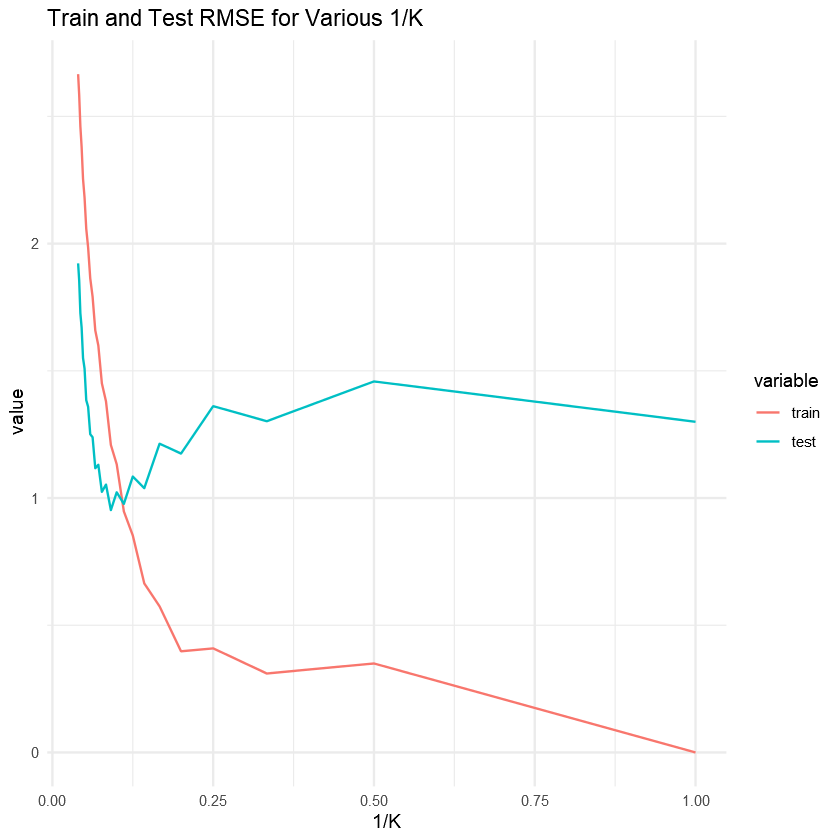

In [32]:
#Plotting using ggplot the train and test errors vs 1/K
ggplot(data=training_test_error.df, aes(x=1/K, y=value, color=variable)) + geom_line()  + theme_minimal() +
       ggtitle("Train and Test RMSE for Various 1/K")